<a href="https://colab.research.google.com/github/VedKate/Vedeneeva_Ekaterina_RT5/blob/main/DUDL-course-practice/Gradient_descent_cch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

# make the equations look nicer

from IPython.display import display as dis
from IPython import display
display.set_matplotlib_formats('svg')

# Gradient descent 1D

## Cteation of functions

In [ ]:
# create symbolic variables in sympy
x = sym.symbols('x')

# create function in sympy (for viz.)
gx = sym.cos(2*sym.pi*x)+x**2
dg = sym.diff(gx)

# function (as a function)
def fx(x):
  return np.cos(2*np.pi*x)+x**2 
# derivative function
def deriv(x):
  return -2*np.pi*np.sin(2*np.pi*x)+2*x # -2*np.pi*np.sin(2*np.pi*x) + 2*x


print('Function:')
dis(gx)
print('Derivative:')
dis(dg)

Function:


x**2 + cos(2*pi*x)

Derivative:


2*x - 2*pi*sin(2*pi*x)

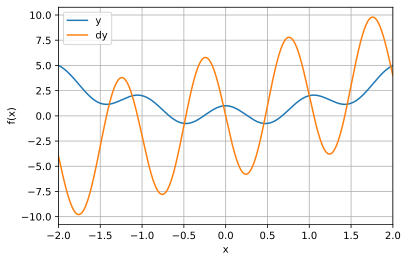

In [ ]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

## Training

In [ ]:
# set a random starting point
localmin = np.random.choice(x,1)
print('Starting point: %s'%localmin)

# set training parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results

modelparams = np.zeros((training_epochs,2)) 
#print(modelparams)

# trining
for i in range(training_epochs):
  grad = deriv(localmin) # finding the direction
  localmin = localmin - grad*learning_rate # moving localmin
  modelparams[i,:] = localmin,grad # addind new piont in the collection for viz

print('Local minima: %s'%localmin)
print('Data type: %s'%localmin.dtype)



Starting point: [-0.554]
Local minima: [-0.47580245]
Data type: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


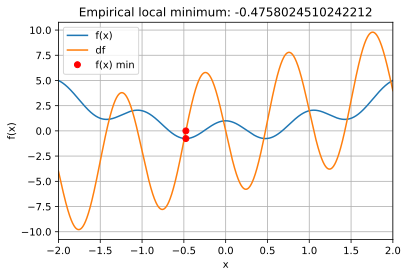

In [ ]:
# plotting function and derivative
plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

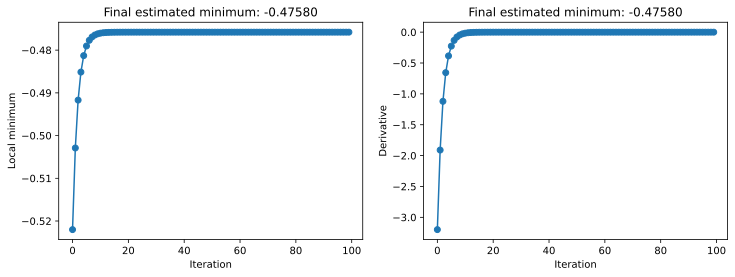

In [ ]:
# plotting the gradient over iterations
fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

Previous code finds one of local minima depends on starting point 

## Zero starting point

(An illustration of vanishig gradient)

In [ ]:
# set a random starting point
localmin = 0
print('Starting point: %s'%localmin)

# set training parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results

modelparams = np.zeros((training_epochs,2)) 
#print(modelparams)

# trining
for i in range(training_epochs):
  grad = deriv(localmin) # finding the direction
  localmin = localmin - grad*learning_rate # moving localmin
  modelparams[i,:] = localmin,grad



print('Local minima: %s'%localmin)
print('Data type: %s'%localmin.dtype)

Starting point: 0
Local minima: 0.0
Data type: float64


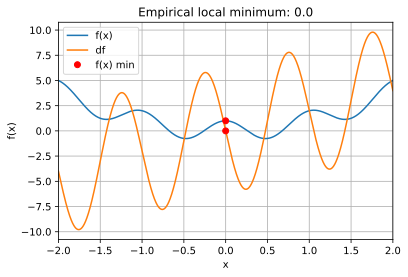

In [ ]:
# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin) # using localmin as a scalar
plt.show()




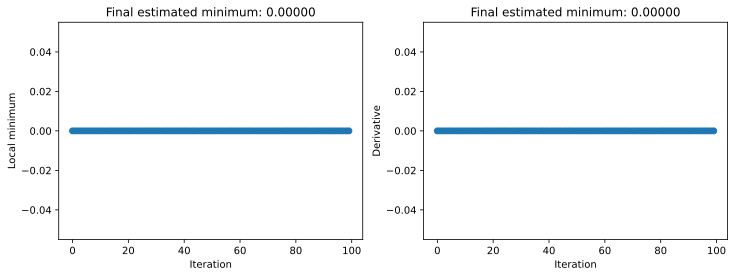

In [ ]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

In [ ]:
deriv(0)

0.0

When we start from 0 equation "localmin = localmin - grad x learning_rate" stucks in 0 point \
becauce 0-0*0=0 \
CONSTANTLY

# Gradient ascent 2D*

There are two ways to make ascent (finding maximum) from descent:

1) Change the localmin-finding function with a "+" instead of "-" (watch "some notes") 

2) Upend the result of the investigated function (local maxima became minima) using "-" before whole equation and find coordinates of mininmum (which is actually maximum). Of shange the sign of deridatives...


In [47]:
# the "peaks" function
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)
  
  z = (3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2))
  return z

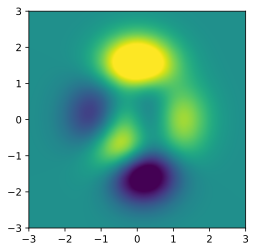

In [48]:
# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# visualize
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [49]:
# create derivatives using sympy

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)

# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

#df_x(1,1)#.evalf()

df_x(1,1).evalf()

-1.07369833656079

### some notes

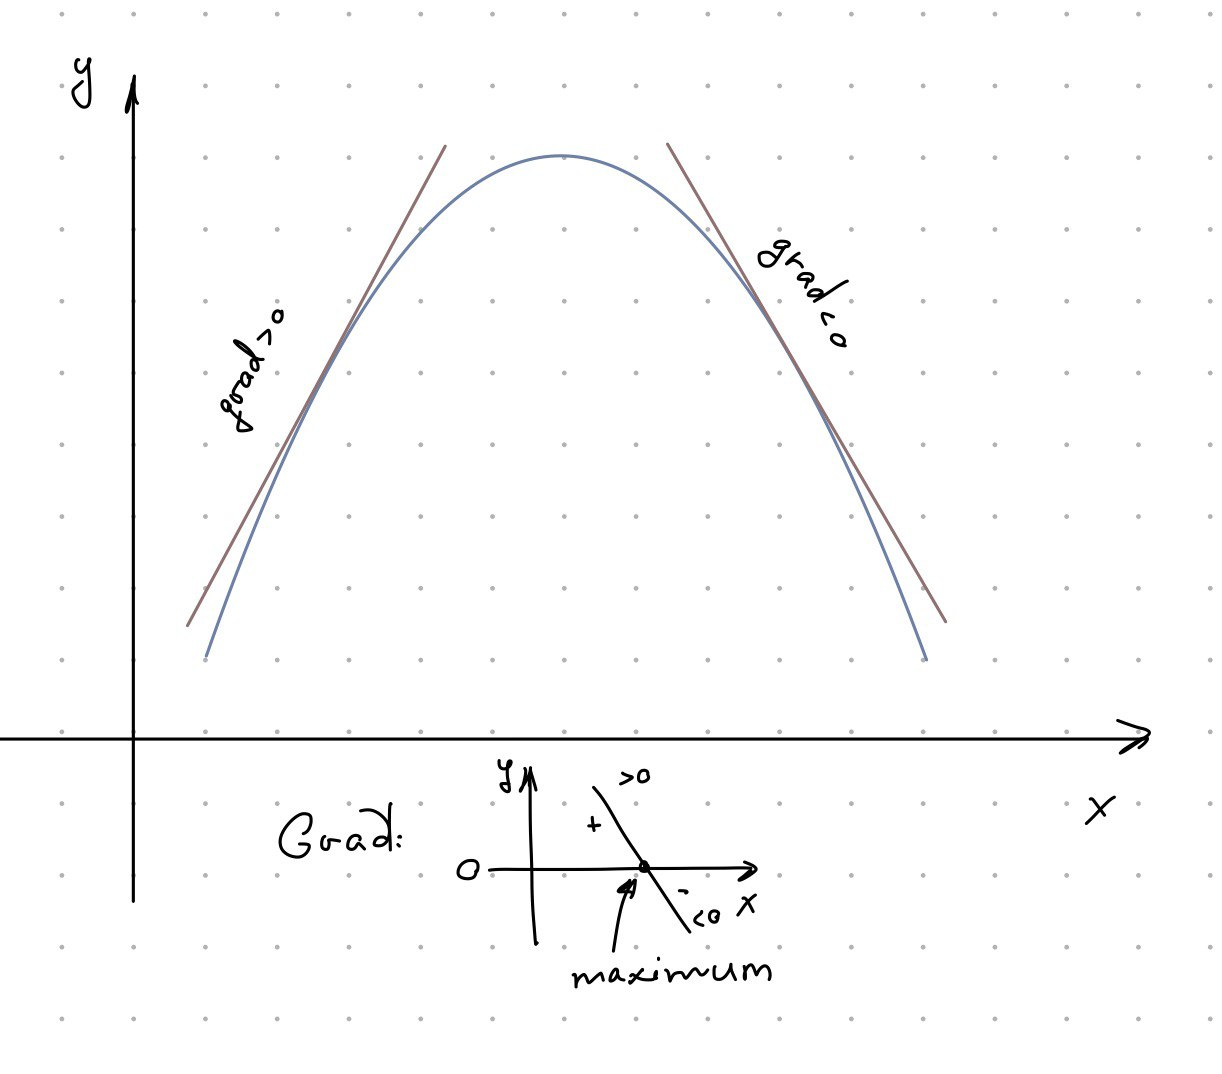

### Training

In [52]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
#startpnt = localmin[:] 
startpnt = [-2,-2]

# learning parameters (with some adjustments)
learning_rate = .02
training_epochs = 10000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(), 
                    df_y(localmin[0],localmin[1]).evalf() 
                  ])
  localmin = localmin + learning_rate*grad  
  trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[-0.00931758195995412 1.58136796293900]
[-2, -2]


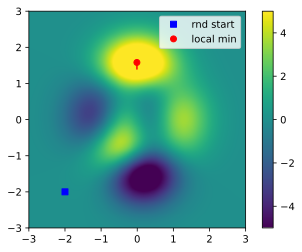

In [53]:
# viz
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()